# Heart Disease Prediction 

In [1]:
#!pip install tensorflow

In [1]:
# importing all the required libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
import missingno as msno
from scipy import stats
import tensorflow as tf

import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import graphviz
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy import stats 
plt.style.use("fivethirtyeight")

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap

import sklearn.model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
#Dataset does not have any missing data
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

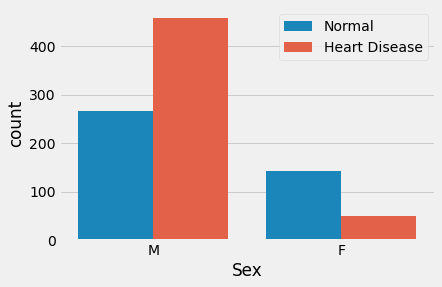

In [10]:
#visualizing the data
sns.countplot(x="Sex", data=data, hue="HeartDisease")
plt.legend(['Normal', 'Heart Disease'])
plt.show()

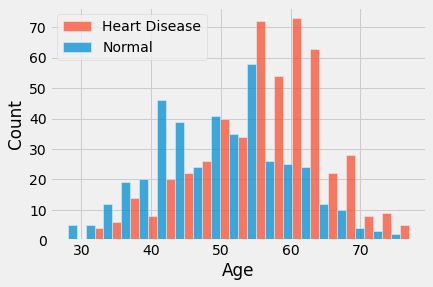

In [11]:
sns.histplot(x="Age", data=data, hue="HeartDisease", multiple='dodge')
plt.legend(['Heart Disease', 'Normal'])
plt.show()

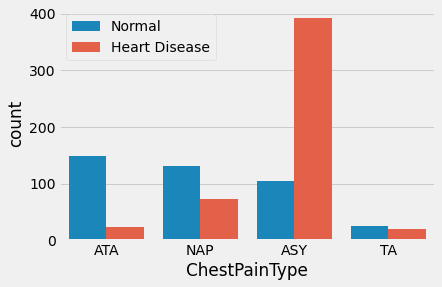

In [12]:
sns.countplot(x="ChestPainType", data=data, hue="HeartDisease")
plt.legend(['Normal', 'Heart Disease'])
plt.show()

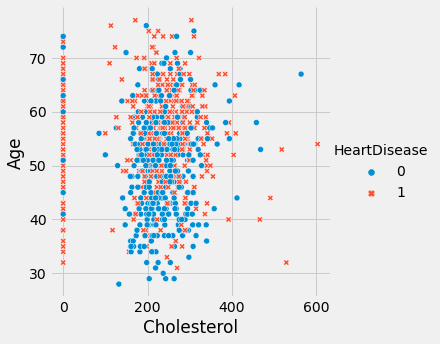

In [13]:
sns.relplot(x="Cholesterol", y="Age", data=data, kind="scatter", hue='HeartDisease', style= 'HeartDisease')
plt.show()

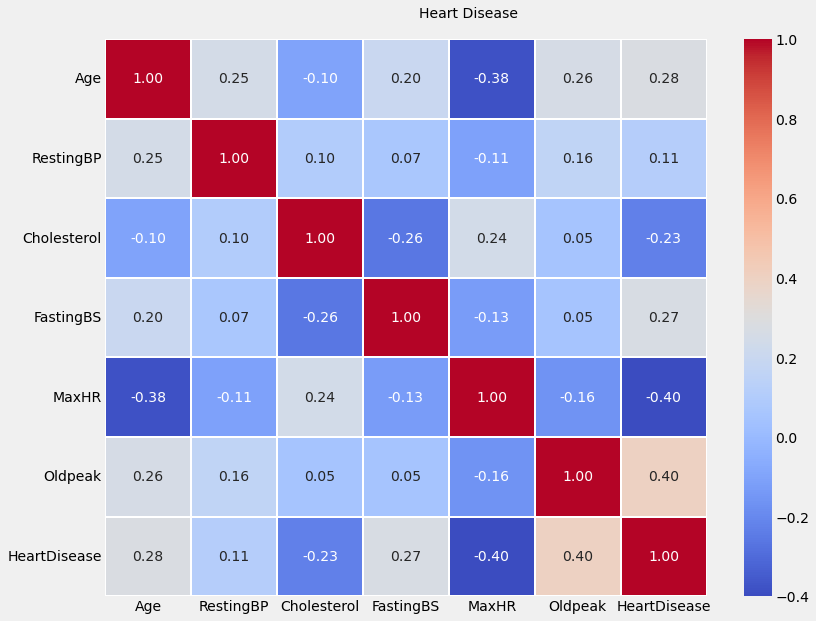

In [14]:
# checking the correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Heart Disease', fontsize=14)

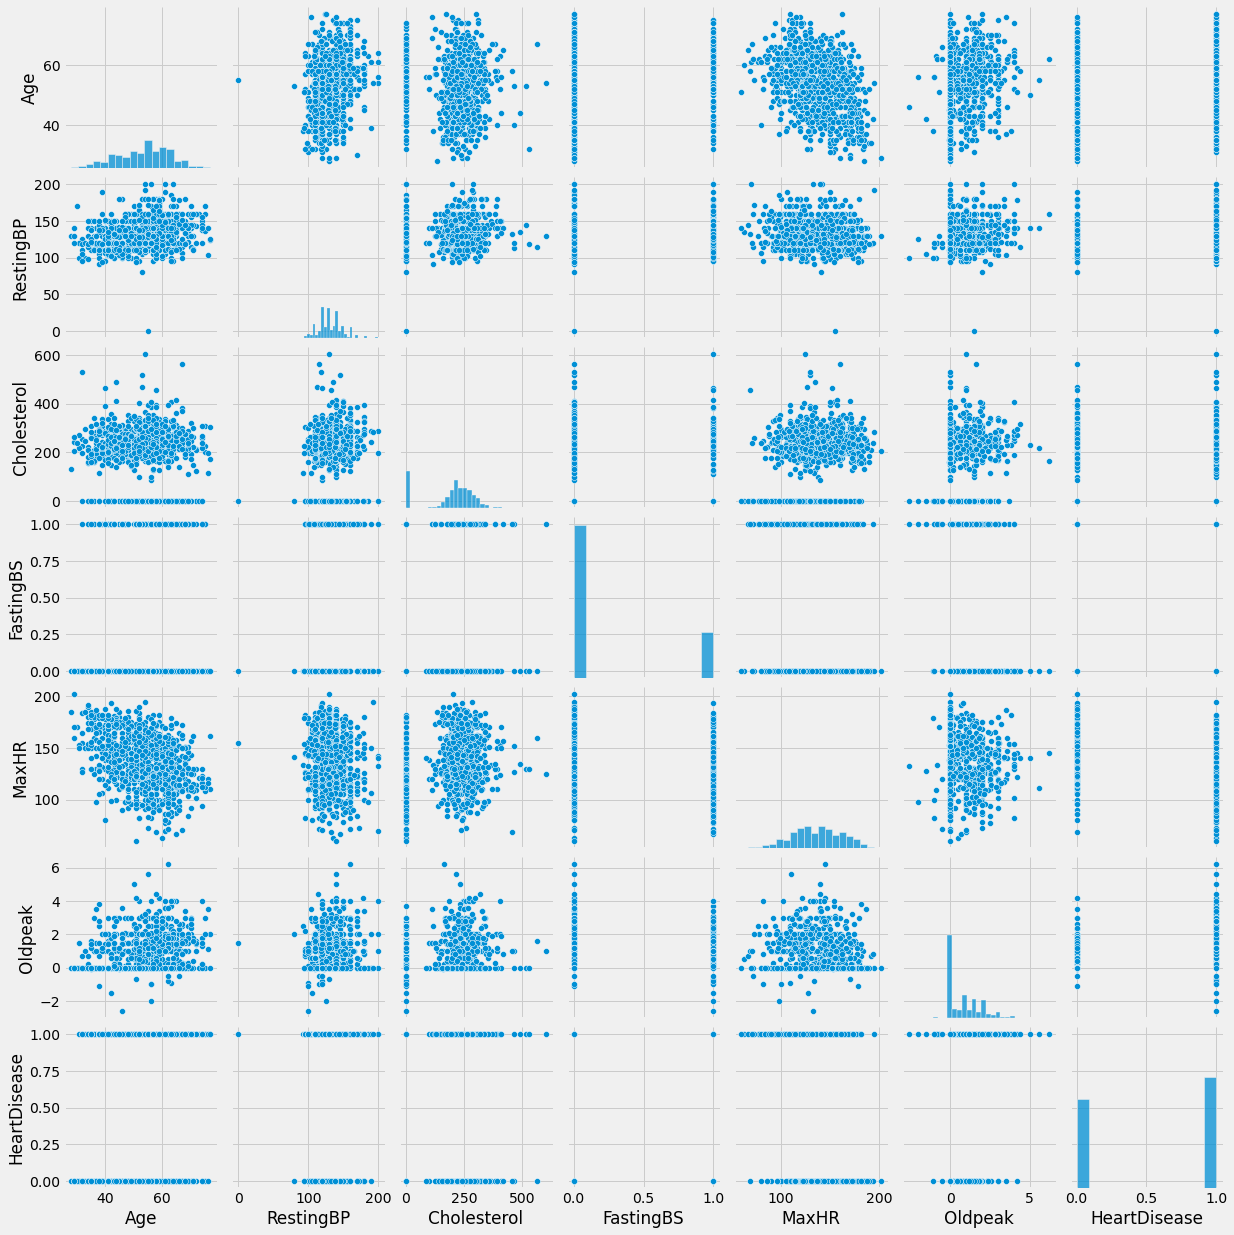

In [15]:
sns.pairplot(data,  palette='Set1')
plt.show()

In [16]:
data['FastingBS'] = data['FastingBS'].astype('object')

In [17]:
numerical_features = data.select_dtypes(include="number").columns.tolist() 
categorical_features = data.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features, compact=True) 
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
Categorical features:
['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
 'ST_Slope']


In [18]:
data[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [19]:
data[categorical_features].describe().T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [20]:
for feature in categorical_features:
    print(data[feature].value_counts())
    print ('------')

M    725
F    193
Name: Sex, dtype: int64
------
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64
------
0    704
1    214
Name: FastingBS, dtype: int64
------
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64
------
N    547
Y    371
Name: ExerciseAngina, dtype: int64
------
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64
------


In [ ]:
data_categoric = data.loc[:, categorical_features]
for i in categorical_features:
    plt.figure()
    sns.countplot(x = i, data = data_categoric)
    plt.title(i)

In [ ]:
data_categoric = data.loc[:, categorical_features]
for i in categorical_features:
    plt.figure()
    sns.countplot(x = i, data = data_categoric,hue = "HeartDisease")
    plt.title(i)

# Logistic Regression - Preprocessing

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#
plt.rcParams['figure.figsize'] = (3, 3)
plt.style.use('seaborn-pastel')
plt.rcParams['figure.dpi'] = 150      
#
c0 = sns.color_palette()[0]
c1 = sns.color_palette()[1]
c2 = sns.color_palette()[2]
#
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#

In [22]:
def points_plot(ax, Xtr, Xte, ytr, yte, 
                clf, 
                mesh = True, colorscale = cmap_light, cdiscrete = cmap_bold, 
                alpha = 0.1, psize = 10, 
                zfunc = False, predicted = False):
#
# note: this function only works for X.shape = (:, 2)
# it is intended to illustrate the classifier boundary
#
# get the column names if they exist to apply
# to the meshed data generated below
#
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#        
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#
    h = 0.02
#
# create a uniform grid spanning the range of the X values
# note that y here is NOT the target, it is the 2nd
# dimension of the desired plot
#
    X = np.concatenate((Xtrain, Xtest))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
#
# predict the target value at each point in the grid
#
# this method uses the probabilities from the classifier
# and applies a function to determine the class
#
    if zfunc:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, 
                         columns = feature_names)
        p0 = clf.predict_proba(mesh_data)[:, 0]
        p1 = clf.predict_proba(mesh_data)[:, 1]
        Z = zfunc(p0, p1)
#
# this method uses the classifier to predict the classes directly
#
    else:
        mesh_data = np.c_[xx.ravel(), yy.ravel()]
        if feature_names is not None:
            mesh_data = pd.DataFrame(mesh_data, 
                                     columns = feature_names)
        Z = clf.predict(mesh_data)
    ZZ = Z.reshape(xx.shape)
#
# plt.pcolormesh() creates a shaded result over the grid
#
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, 
                       cmap = cmap_light, 
                       alpha = alpha, 
                       axes = ax, 
                       shading = 'auto')
#
# add the points to the plot
# these can be the original target values
# or the predicted values
#
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
#
# plot training points
#
    ax.scatter(Xtrain[:, 0], Xtrain[:, 1], 
               c = showtr - 1, 
               cmap = cmap_bold, 
               s = psize, 
               alpha = alpha, 
               edgecolor = "k")
#    
# plot testing points
#
    ax.scatter(Xtest[:, 0], Xtest[:, 1],
               c = showte - 1, 
               cmap = cmap_bold, 
               s = psize + 10,
               alpha = alpha, 
               marker = "s")
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
#
    return ax, xx, yy

In [23]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, 
                     clf, colorscale = cmap_light, cdiscrete = cmap_bold, 
                     ccolor = cm, 
                     alpha = 0.1, psize = 10):
    try:
        feature_names = Xtr.columns
    except:
        feature_names = None
#        
    Xtrain = np.array(Xtr)
    Xtest = np.array(Xte)
#    
    ax, xx, yy = points_plot(ax, Xtr, Xte, ytr, yte,
                         clf,
                         mesh = False, 
                         colorscale = colorscale, cdiscrete = cdiscrete, 
                         psize = psize, alpha = alpha,
                         predicted = True) 
    mesh_data = np.c_[xx.ravel(), yy.ravel()]
    if feature_names is not None:
        mesh_data = pd.DataFrame(mesh_data, 
                     columns = feature_names)    
    Z = clf.predict_proba(mesh_data)[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap = ccolor, alpha = 0.2)
    cs2 = plt.contour(xx, yy, Z, cmap = ccolor, alpha = 0.6)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize = 12)
#
    plt.show()

In [24]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
 'ST_Slope']
df = pd.get_dummies(data, columns = categorical_features)
print('The data have ', df.shape[0], ' rows and ', df.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df.columns)))

The data have  918  rows and  22  columns

column names: 

Age
RestingBP
Cholesterol
MaxHR
Oldpeak
HeartDisease
Sex_F
Sex_M
ChestPainType_ASY
ChestPainType_ATA
ChestPainType_NAP
ChestPainType_TA
FastingBS_0
FastingBS_1
RestingECG_LVH
RestingECG_Normal
RestingECG_ST
ExerciseAngina_N
ExerciseAngina_Y
ST_Slope_Down
ST_Slope_Flat
ST_Slope_Up


In [25]:
class_counts = data['HeartDisease'].value_counts()
class_counts

1    508
0    410
Name: HeartDisease, dtype: int64

In [26]:
type(class_counts)

pandas.core.series.Series

In [27]:
class_percentages = pd.Series([(x / df.shape[0]) * 100.00 for x in class_counts])
class_percentages

0    55.337691
1    44.662309
dtype: float64

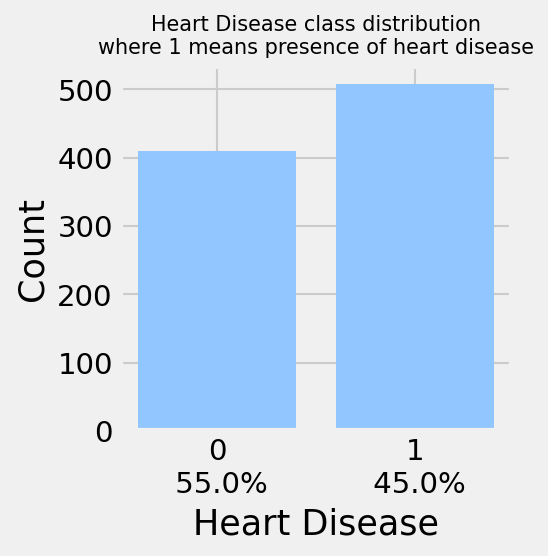

In [28]:
fig, ax = plt.subplots()
ax.bar(class_counts.index, class_counts)
ax.set_xticks([0, 1])
ax.set_xticklabels(class_percentages.index.astype(str) + '\n' + ' ' +
                   class_percentages.round(0).astype(str) + '%')
ax.set_ylabel('Count')
ax.set_xlabel('Heart Disease')
ax.set_title('Heart Disease class distribution\nwhere 1 means presence of heart disease',
              fontsize = 10)
plt.show()

<Figure size 1200x750 with 0 Axes>

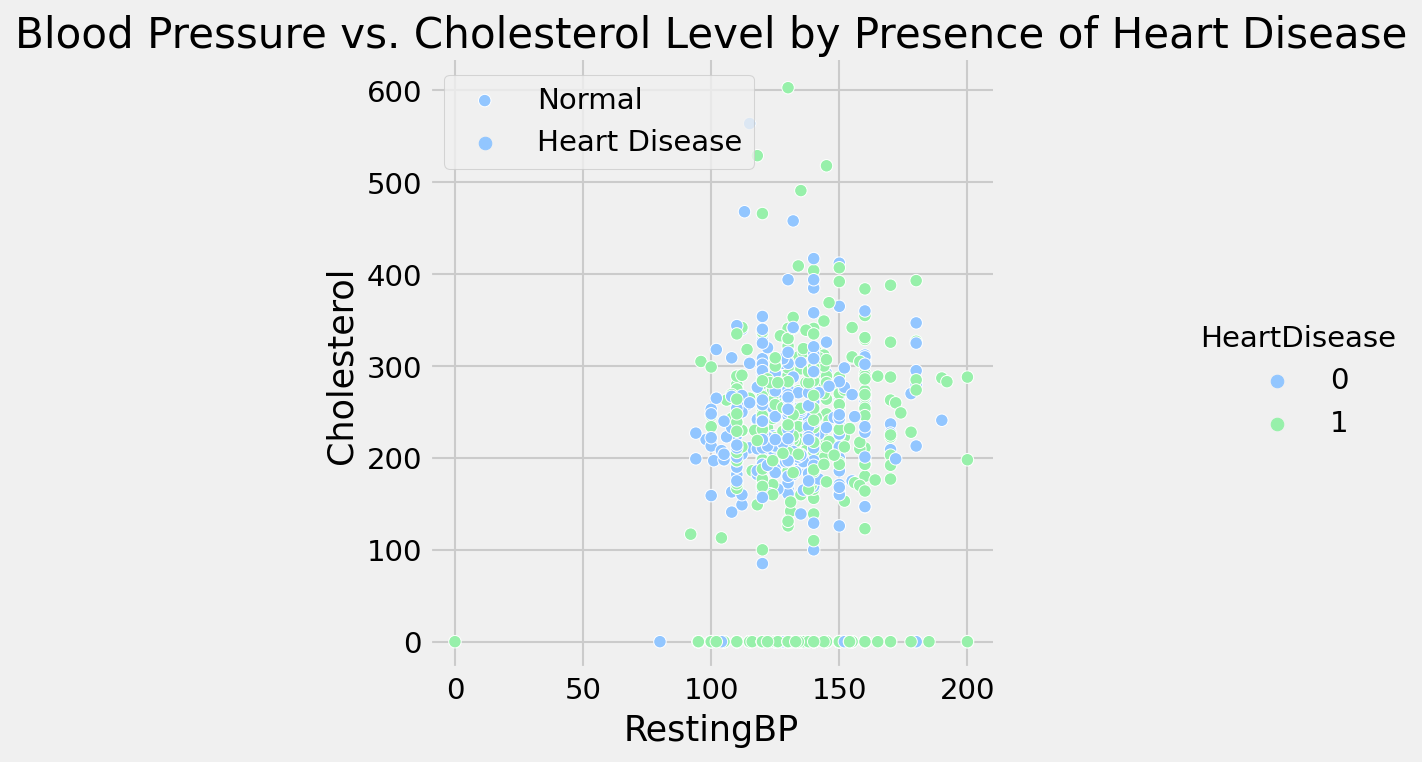

In [29]:
plt.figure(figsize=(8,5))
sns.relplot(x='RestingBP', y='Cholesterol', data=df, kind="scatter", hue='HeartDisease')
plt.title('Blood Pressure vs. Cholesterol Level by Presence of Heart Disease')
plt.legend(['Normal', 'Heart Disease'])
plt.show()

Building a Logistic Regression with only Two Variables

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(df[['Cholesterol','RestingBP']],
                                                data['HeartDisease'],
                                                train_size = 0.80,
                                                random_state = 42)

In [31]:
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)

In [32]:
classifier.fit(Xtrain, ytrain)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

In [33]:
print(f'Accuracy on training data: {accuracy_score(classifier.predict(Xtrain), ytrain):.2f}')

Accuracy on training data: 0.61


In [34]:
print(f'Accuracy on test data: {accuracy_score(classifier.predict(Xtest), ytest):.2f}')

Accuracy on test data: 0.54


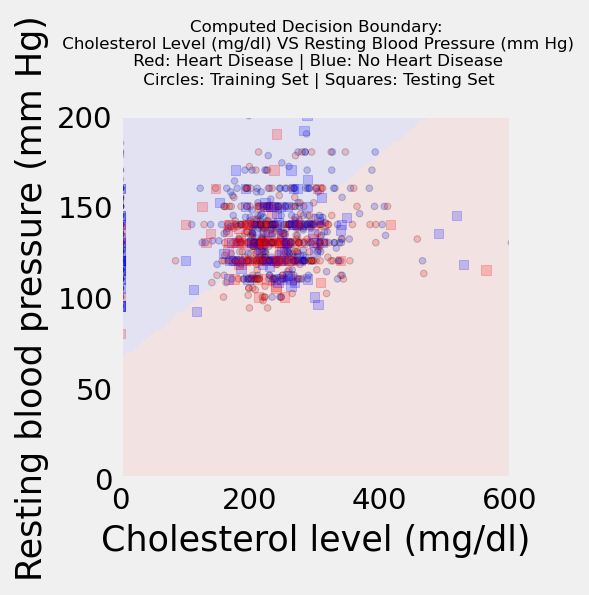

In [35]:
plt.figure()
ax = plt.gca()
ax.set_ylabel('Resting blood pressure (mm Hg)')
ax.set_xlabel('Cholesterol level (mg/dl)')
ax.set_title('Computed Decision Boundary:\n ' +
             'Cholesterol Level (mg/dl) VS Resting Blood Pressure (mm Hg)' +
             '\n Red: Heart Disease | Blue: No Heart Disease' +
             '\n Circles: Training Set | Squares: Testing Set\n',
            fontsize = 8)
_ = points_plot(ax, Xtrain, Xtest, ytrain, ytest, classifier, alpha = 0.2)

In [36]:
print("Classification Report for Training Data")
print(classification_report(ytrain, classifier.predict(Xtrain)))

Classification Report for Training Data
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       333
           1       0.64      0.66      0.65       401

    accuracy                           0.61       734
   macro avg       0.60      0.60      0.60       734
weighted avg       0.61      0.61      0.61       734



In [37]:
print("Classification Report for Test Data")
print(classification_report(ytest, classifier.predict(Xtest)))

Classification Report for Test Data
              precision    recall  f1-score   support

           0       0.45      0.47      0.46        77
           1       0.61      0.59      0.60       107

    accuracy                           0.54       184
   macro avg       0.53      0.53      0.53       184
weighted avg       0.54      0.54      0.54       184



In [38]:
X = df.drop(columns = ['HeartDisease'])
print("X: ", type(X), X.shape)

X:  <class 'pandas.core.frame.DataFrame'> (918, 21)


In [39]:
y = data['HeartDisease']
print("y: ", type(y), y.shape)

y:  <class 'pandas.core.series.Series'> (918,)


In [40]:
list(X.columns)

['Age',
 'RestingBP',
 'Cholesterol',
 'MaxHR',
 'Oldpeak',
 'Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'FastingBS_0',
 'FastingBS_1',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [41]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, random_state = 2)
print('Training split has ', Xlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ylr))+ ')')
print('Test split has ', Xtestlr.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.', 
      '(' + str(len(ytestlr)) + ')')

Training split has  688  rows
 and the corresponding labels have an equal number of values. (688)
Test split has  230  rows
 and the corresponding labels have an equal number of values. (230)


In [42]:
def plot_y_ratios(y, ytest):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y == 0].count(), 
                                    y[y == 1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 125)
    ax[1].bar(x = [0, 1], height = [ytest[ytest == 0].count(),
                                    ytest[ytest == 1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 125)
    ax[1].set_xticks([0, 1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('heart disease\n(0 = no disease)', fontsize = 8)
    ax[0].set_title('% heart disease (where 1 means presence of heart diseases):\n' +
                    'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +
                    '\ntest: ' + str(round(100 * (ytest[ytest ==1].count()/ytest.shape[0]), 0)),
                   fontsize = 10)
    plt.show() 

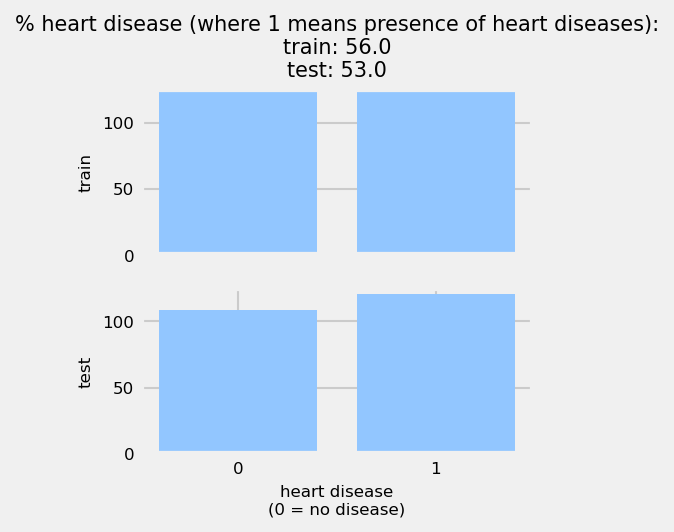

In [43]:
plot_y_ratios(ylr, ytestlr)

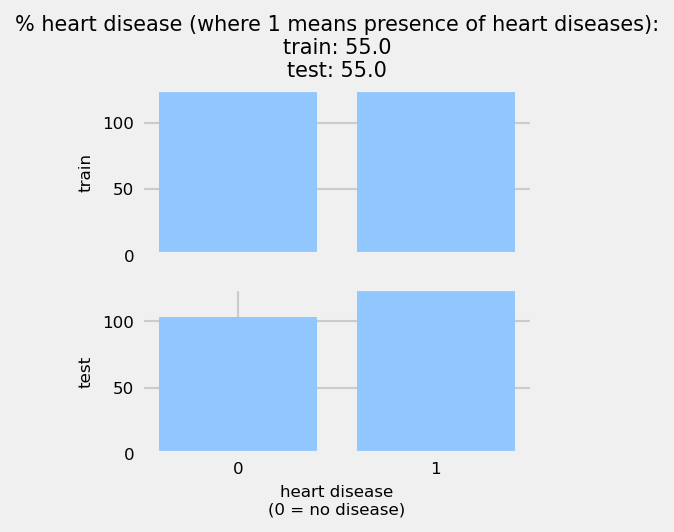

In [44]:
Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y, random_state = 2, stratify = y)
plot_y_ratios(ylrstrat, ytestlrstrat)

In [45]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [46]:
clf.fit(Xlrstrat, ylrstrat) 

LogisticRegression(max_iter=500, solver='newton-cg')

In [47]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)

In [48]:
print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.90


In [49]:
print("[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order]", 
      f'{accuracy_score(ytestlrstrat, y_predict_test):.2f}')

[Test] Accuracy score: (ytestlrstrat, y_predict_test) [**note reversed order] 0.90


In [50]:
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", 
      f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Training] Accuracy score: (ylrstrat, y_predict_training) 0.86


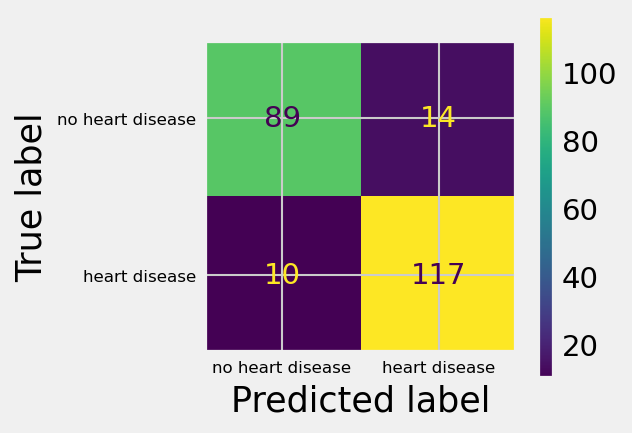

In [51]:
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['no heart disease', 'heart disease'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
ax.set_yticklabels(labels = ['no heart disease', 'heart disease'], fontsize = 8)
display_cm.plot(ax = ax)

In [52]:
print(classification_report(ylrstrat, y_predict_training))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       307
           1       0.87      0.89      0.88       381

    accuracy                           0.86       688
   macro avg       0.86      0.86      0.86       688
weighted avg       0.86      0.86      0.86       688



In [53]:
print(classification_report(ytestlrstrat, y_predict_test))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88       103
           1       0.89      0.92      0.91       127

    accuracy                           0.90       230
   macro avg       0.90      0.89      0.89       230
weighted avg       0.90      0.90      0.90       230



In [54]:
# here we try multiple splits and see the effects, with the same proportion 75% train and 25% test
#
# keep lists for training accuracy, 
#                test accuracy, 
#                and the difference between the latter and the former
#
training_accuracy = []
test_accuracy = []
accuracy_difference = []
#
# define number of trials
#
n_splits = 25
#
# define LogisticRegression object
#
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)
#
# loop over multiple trials
#
for i in range(0, n_splits):
#
# perform a split for this iteration, 
# using different random_state for every iteration
# this ensures each split is likely to be unique
#
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y, stratify = y, random_state = i)
#    
# fit the Classifier on the training set
#
    clf.fit(Xlr, ylr)
#
# predict the labels for the training data
#
    y_predict_training = clf.predict(Xlr)
#
# predict the labels for the test data
#
    y_predict_test = clf.predict(Xtestlr)
#
# save training set accuracy for this split
#
    tr_accuracy = accuracy_score(y_predict_training, ylr)
    training_accuracy.append(tr_accuracy)
#
# save test set accuracy for this split
#
    tst_accuracy = accuracy_score(y_predict_test, ytestlr)
    test_accuracy.append(tst_accuracy)
#
# save difference between the two acuracy values
#
    accuracy_difference.append(tst_accuracy - tr_accuracy)

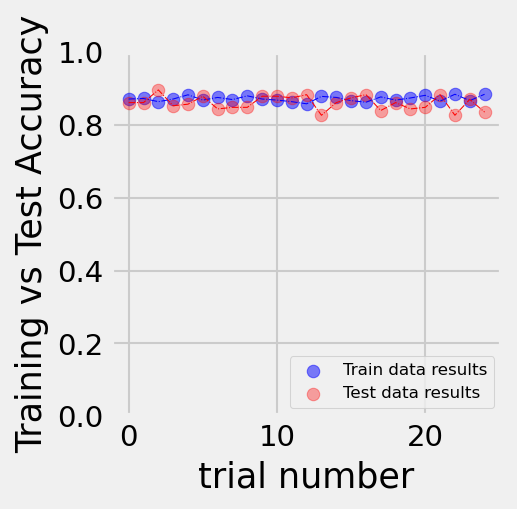

In [55]:
fig, ax = plt.subplots()
ax.scatter(range(len(training_accuracy)),
           training_accuracy, 
           color = 'blue', 
           alpha = 0.5,
           label = 'Train data results')
ax.plot(range(len(training_accuracy)),
        training_accuracy, 
        color = 'blue', 
        linestyle = '-.',
        linewidth = 0.5)
ax.scatter(range(len(test_accuracy)),
           test_accuracy, 
           color = 'red', 
           alpha = 0.35, 
           label = 'Test data results')
ax.plot(range(len(test_accuracy)),
        test_accuracy, 
        color = 'red', 
        linestyle = '-.',
        linewidth = 0.5)
ax.legend(fontsize = 8, loc = "lower right")
ax.set_ylabel('Training vs Test Accuracy')
ax.set_ylim(0, 1)
ax.set_xlabel('trial number')
plt.show()

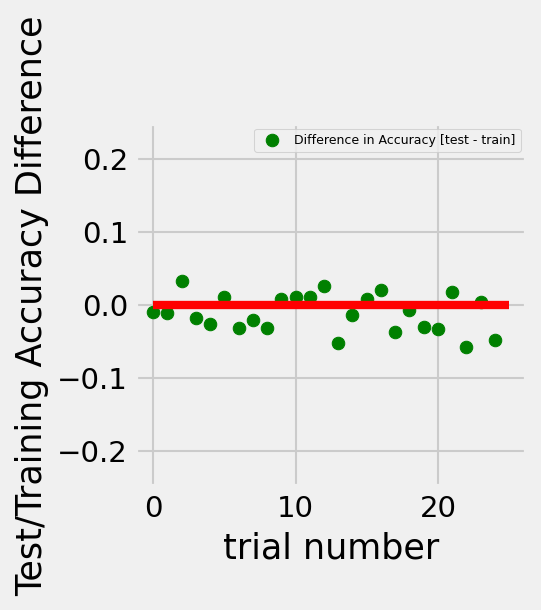

In [56]:
fig, ax = plt.subplots()
ax.scatter(range(len(accuracy_difference)),
           accuracy_difference, 
           color = 'green', 
           label = 'Difference in Accuracy [test - train]')
ax.plot([0, len(accuracy_difference)], [0, 0], 'red')
ax.legend(fontsize = 6)
ax.set_ylabel('Test/Training Accuracy Difference')
ax.set_ylim(-0.25, 0.25)
ax.set_xlabel('trial number')
plt.show()

In [57]:
print("[Training Classification Report]")
print(classification_report(ylr, y_predict_training))
#
print("[Test Classification Report]")
print(classification_report(ytestlr, y_predict_test))

[Training Classification Report]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       307
           1       0.89      0.91      0.90       381

    accuracy                           0.88       688
   macro avg       0.88      0.88      0.88       688
weighted avg       0.88      0.88      0.88       688

[Test Classification Report]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       103
           1       0.82      0.89      0.86       127

    accuracy                           0.83       230
   macro avg       0.84      0.83      0.83       230
weighted avg       0.84      0.83      0.83       230



In [58]:
def cv_score(clf, x, y, score_func = accuracy_score):
    result = 0
    nfold = 5
    x.reset_index(drop = True, inplace = True)
    y.index = x.index
    for train, test in KFold(nfold, shuffle = True,
                             random_state = 42).split(x):
        clf.fit(x.loc[train, :], y[train])
        result += score_func(clf.predict(x.loc[test, :]), y[test])
    return result / nfold

In [59]:
clf = LogisticRegression(solver = 'liblinear', max_iter = 500)
score = cv_score(clf, Xlr, ylr)
print(f'{score:.2f}')

0.87


In [60]:
#the grid of parameters to search over
Cs = [0.001, 0.1, 1, 10, 100]

# your turn
def tune_Cs(x, y, Cs=[0.001, 0.1, 1, 10, 100], score_func=accuracy_score):
    Cs = Cs
    cscores = np.empty(len(Cs))
    for i, C in enumerate(Cs):
        clf = LogisticRegression(C=C)
        avg_score = cv_score(clf, x, y, score_func=score_func)
        cscores[i] = avg_score
    maxC = Cs[np.argmax(cscores)]
    print("Best C is", maxC)
    return cscores

tune_Cs(Xlr, ylr)

Best C is 1


array([0.7136782 , 0.86765048, 0.87059135, 0.87059135, 0.87059135])

In [61]:
clf = LogisticRegression(C=10)
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.8434782608695652


In [62]:
clf = sklearn.model_selection.GridSearchCV(LogisticRegression(), {'C': Cs}, cv=5)
clf.fit(Xlr, ylr)
print("Train score:", clf.score(Xlr, ylr))
print("Test score:", clf.score(Xtestlr, ytestlr))
clf.best_params_

Train score: 0.875
Test score: 0.8391304347826087


{'C': 1}

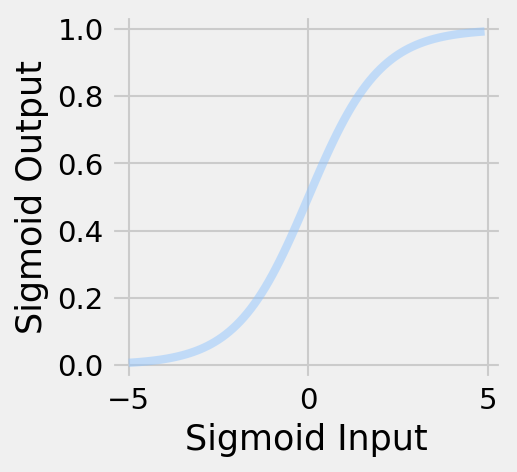

In [63]:
h = lambda z: 1. / (1 + np.exp(-z))
zs = np.arange(-5, 5, 0.1)
fig, ax = plt.subplots()
ax.plot(zs, h(zs), alpha=0.5)
ax.set_ylabel('Sigmoid Output')
ax.set_xlabel('Sigmoid Input')
plt.show()

In [64]:
clf.predict_proba(Xtestlr)

array([[0.02999709, 0.97000291],
       [0.25722603, 0.74277397],
       [0.01625436, 0.98374564],
       [0.01070562, 0.98929438],
       [0.60135842, 0.39864158],
       [0.00980475, 0.99019525],
       [0.02433346, 0.97566654],
       [0.0753049 , 0.9246951 ],
       [0.12960271, 0.87039729],
       [0.2163243 , 0.7836757 ],
       [0.69367317, 0.30632683],
       [0.14312373, 0.85687627],
       [0.02304636, 0.97695364],
       [0.03417317, 0.96582683],
       [0.94109863, 0.05890137],
       [0.10681314, 0.89318686],
       [0.98905156, 0.01094844],
       [0.00572254, 0.99427746],
       [0.16981889, 0.83018111],
       [0.17483057, 0.82516943],
       [0.32907138, 0.67092862],
       [0.98899832, 0.01100168],
       [0.601418  , 0.398582  ],
       [0.95386696, 0.04613304],
       [0.1031928 , 0.8968072 ],
       [0.10668788, 0.89331212],
       [0.48423382, 0.51576618],
       [0.44023396, 0.55976604],
       [0.46177515, 0.53822485],
       [0.56673155, 0.43326845],
       [0.

In [65]:
Xtrain, Xtest, ytrain, ytest = \
    train_test_split(df[['Cholesterol','RestingBP']],
                     data['HeartDisease'],
                     train_size = 0.80,
                     random_state = 42)
classifier = LogisticRegression(solver = 'liblinear', max_iter = 500, C = 1000)
classifier.fit(Xtrain, ytrain)

LogisticRegression(C=1000, max_iter=500, solver='liblinear')

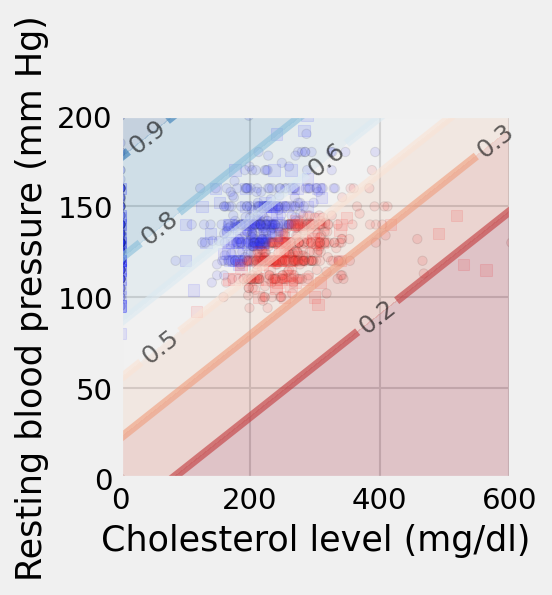

In [66]:
plt.figure()
ax = plt.gca()
ax.set_ylabel('Resting blood pressure (mm Hg)')
ax.set_xlabel('Cholesterol level (mg/dl)')
_ = points_plot_prob(ax, Xtrain, Xtest, ytrain, ytest, classifier, psize = 20, alpha = 0.1)

# Decision Tree

In [2]:
df_dt = pd.read_csv('heart.csv')

In [3]:
df_modelling = df_dt.copy()

In [4]:
df_dt['FastingBS'] = df_dt['FastingBS'].astype('object')
df_dt['HeartDisease'] = df_dt['HeartDisease'].astype('object')

In [5]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
categorical_features = df_dt.select_dtypes(include="object").columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical features:
['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
 'ST_Slope', 'HeartDisease']


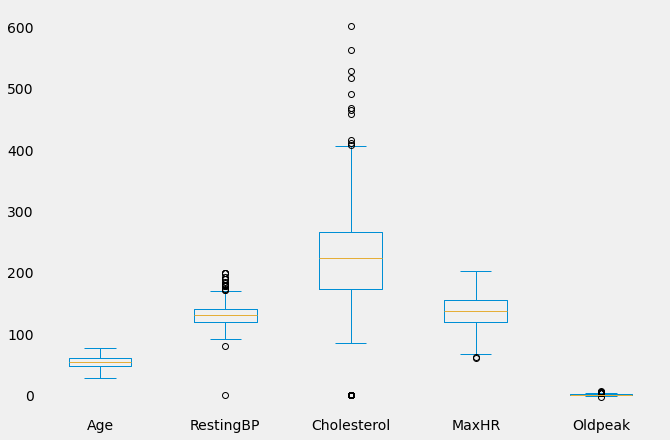

In [6]:
df_dt[numerical_features].plot(kind="box", figsize=(10, 7))
plt.grid(False)
plt.show()

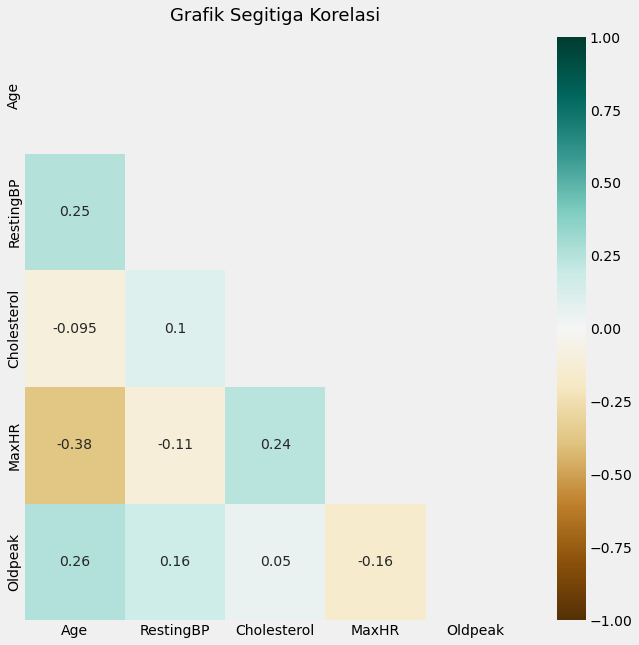

In [7]:
plt.figure(figsize=(10, 10))
mask = np.triu(np.ones_like(df_dt.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_dt.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=16);

In [8]:
df_modelling['FastingBS'] = df_modelling['FastingBS'].astype('object')

In [9]:
X = df_modelling.drop(columns=["HeartDisease"])
y = df_modelling["HeartDisease"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=101)
X_dev, X_test, y_dev, y_test = train_test_split(X_test, y_test, test_size=.5, stratify=y_test, random_state=101)

print("training size:", X_train.shape[0])
print("development size:", X_dev.shape[0])
print("test size:", X_test.shape[0])

print(f"training size: {X_train.shape[0]} ({100*X_train.shape[0] / X.shape[0]:.3f}%)")
print(f"development size: {X_dev.shape[0]} ({100*X_dev.shape[0] / X.shape[0]:.3f}%)")
print(f"test size: {X_test.shape[0]} ({100*X_test.shape[0] / X.shape[0]:.3f}%)")

training size: 734
development size: 92
test size: 92
training size: 734 (79.956%)
development size: 92 (10.022%)
test size: 92 (10.022%)


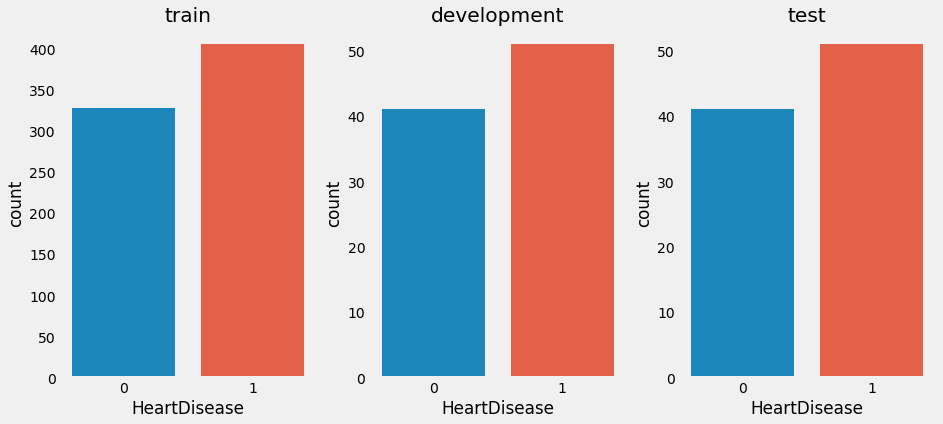

In [11]:
fig, axis = plt.subplots(1, 3, figsize=(14, 6))
for idx, label in enumerate([
    (y_train, "train"), (y_dev, "development"), (y_test, "test")
]):
    sns.countplot(x=label[0], ax=axis[idx])
    axis[idx].set_title(label[1])
    axis[idx].grid(False)
plt.show()

In [12]:
nominal_features = ["Sex", "ChestPainType", "ST_Slope"]
ordinal_features = X.select_dtypes(
    include="object"
).drop(columns=nominal_features).columns.tolist()

print("nominal features:", nominal_features)
print("ordinal features:")
pprint(ordinal_features, compact=True)

nominal features: ['Sex', 'ChestPainType', 'ST_Slope']
ordinal features:
['FastingBS', 'RestingECG', 'ExerciseAngina']


In [13]:
onehot = OneHotEncoder()
onehot.fit(X_train[nominal_features])
X_train_onehot = pd.DataFrame(
    onehot.transform(X_train[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_dev_onehot = pd.DataFrame(
    onehot.transform(X_dev[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_test_onehot = pd.DataFrame(
    onehot.transform(X_test[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
print("one-hot matrix:")
display(X_train_onehot)

ordinal = OrdinalEncoder()
ordinal.fit(X_train[ordinal_features])
X_train_ordinal = pd.DataFrame(ordinal.transform(X_train[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_dev_ordinal = pd.DataFrame(
    ordinal.transform(X_dev[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_test_ordinal = pd.DataFrame(
    ordinal.transform(X_test[ordinal_features]),
    columns=ordinal.feature_names_in_
)
print("ordinal matrix:")
display(X_train_ordinal)

one-hot matrix:


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
729,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
730,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
731,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
732,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


ordinal matrix:


,FastingBS,RestingECG,ExerciseAngina
0,0.0,2.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
729,0.0,1.0,0.0
730,1.0,1.0,0.0
731,0.0,1.0,1.0
732,0.0,2.0,1.0


In [14]:
X_train_combined = pd.concat([X_train[numerical_features].reset_index(drop=True), X_train_onehot, X_train_ordinal], axis=1)
X_dev_combined = pd.concat([X_dev[numerical_features].reset_index(drop=True), X_dev_onehot, X_dev_ordinal], axis=1)
X_test_combined = pd.concat([X_test[numerical_features].reset_index(drop=True), X_test_onehot, X_test_ordinal], axis=1)

X_train_combined.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS,RestingECG,ExerciseAngina
0,43,120,291,155,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
1,56,130,184,100,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,52,160,196,165,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,58,100,248,122,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,45,130,237,170,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [15]:
scaler = StandardScaler()
scaler.fit(X_train_combined)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_combined),
    columns=X_train_combined.columns
)
X_dev_scaled = pd.DataFrame(
    scaler.transform(X_dev_combined),
    columns=X_dev_combined.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_combined),
    columns=X_test_combined.columns
)

with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS,RestingECG,ExerciseAngina
0,-1.116659,-0.648106,0.845479,0.739554,-0.847637,-0.504679,0.504679,-1.106455,-0.487621,-0.519515,4.608950,-0.267456,1.016485,-0.888957,-0.553218,1.602009,-0.850297
1,0.278543,-0.120068,-0.118843,-1.414388,-0.847637,-0.504679,0.504679,-1.106455,2.050774,-0.519515,-0.216969,-0.267456,-0.983783,1.124914,-0.553218,0.000000,-0.850297
2,-0.150750,1.464048,-0.010695,1.131179,-0.847637,-0.504679,0.504679,-1.106455,2.050774,-0.519515,-0.216969,-0.267456,-0.983783,1.124914,-0.553218,0.000000,-0.850297
3,0.493190,-1.704183,0.457948,-0.552811,0.107630,1.981458,-1.981458,0.903787,-0.487621,-0.519515,-0.216969,-0.267456,1.016485,-0.888957,-0.553218,-1.602009,-0.850297
4,-0.902012,-0.120068,0.358812,1.326992,-0.847637,1.981458,-1.981458,-1.106455,2.050774,-0.519515,-0.216969,-0.267456,-0.983783,1.124914,-0.553218,0.000000,-0.850297


In [16]:
model_dt = DecisionTreeClassifier(random_state=11)

model_dt.fit(X_train_scaled.astype(int), y_train.astype(int))

preds_train = model_dt.predict(X_train_scaled) # training data
preds_dev = model_dt.predict(X_dev_scaled) # validation data
preds_test = model_dt.predict(X_test_scaled) # testing data

In [17]:
print("train prediction samples:\n", preds_train[:20])
print("train target samples:\n", y_train[:20].tolist())

train prediction samples:
 [0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1]
train target samples:
 [1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1]


In [18]:
print("development prediction samples:\n", preds_dev[:20])
print("development target samples:\n", y_dev[:20].tolist())

development prediction samples:
 [1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0]
development target samples:
 [1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1]


In [19]:
print("test prediction samples:\n", preds_test[:20])
print("test target samples:\n", y_test[:20].tolist())

test prediction samples:
 [1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 0 1]
test target samples:
 [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


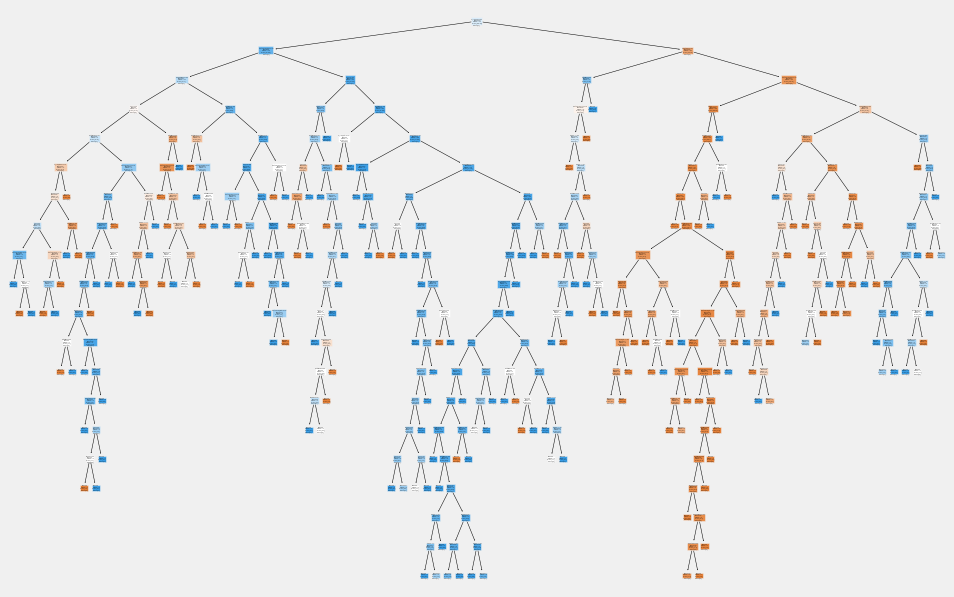

In [20]:
plt.figure(figsize=(15, 10))
plot_tree(
    model_dt,
    feature_names=model_dt.feature_names_in_,
    class_names=True,
    filled=True,
)
plt.show()

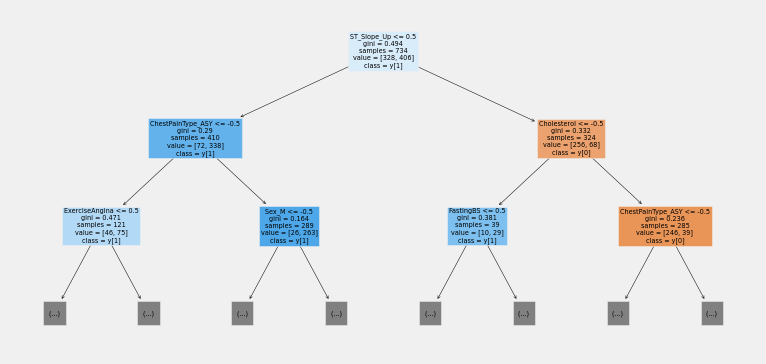

In [21]:
plt.figure(figsize=(12, 6))
plot_tree(model_dt,feature_names = model_dt.feature_names_in_,  max_depth=2, class_names=True,
    filled=True,)
plt.show()

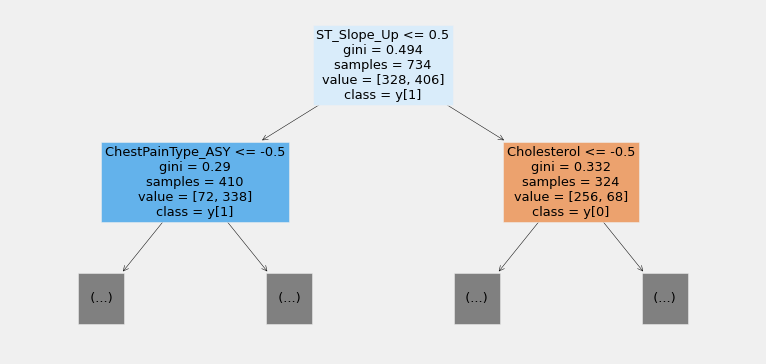

In [22]:
plt.figure(figsize=(12, 6))
plot_tree(model_dt, feature_names = model_dt.feature_names_in_,  max_depth=1, class_names=True,
    filled=True)
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       328
           1       0.90      0.89      0.90       406

    accuracy                           0.89       734
   macro avg       0.89      0.89      0.89       734
weighted avg       0.89      0.89      0.89       734



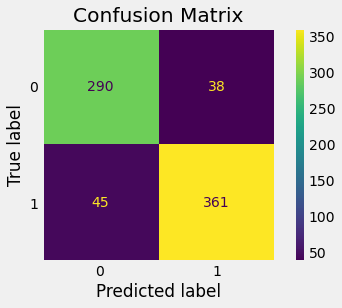

In [23]:
print(classification_report(y_train, preds_train))

ConfusionMatrixDisplay.from_predictions(y_train, preds_train)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#asagidakini sonradan ekledim calisacakmi bir dene!!!
print('Training set score: {:.4f}'.format(model_dt.score(y_train, preds_train)))

              precision    recall  f1-score   support

           0       0.72      0.83      0.77        41
           1       0.84      0.75      0.79        51

    accuracy                           0.78        92
   macro avg       0.78      0.79      0.78        92
weighted avg       0.79      0.78      0.78        92



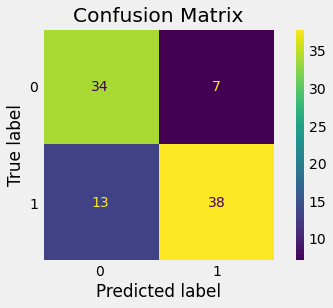

In [24]:
print(classification_report(y_dev, preds_dev))

ConfusionMatrixDisplay.from_predictions(y_dev, preds_dev)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#asagidakini sonradan ekledim calisacakmi bir dene!!!
print('Training set score: {:.4f}'.format(model_dt.score(y_dev, preds_dev)))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.84      0.80      0.82        51

    accuracy                           0.80        92
   macro avg       0.80      0.80      0.80        92
weighted avg       0.81      0.80      0.80        92



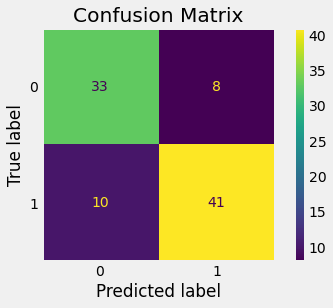

In [25]:
print(classification_report(y_test, preds_test))

ConfusionMatrixDisplay.from_predictions(y_test, preds_test)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#asagidakini sonradan ekledim calisacakmi bir dene!!!
print('Training set score: {:.4f}'.format(model_dt.score(y_test, preds_test)))

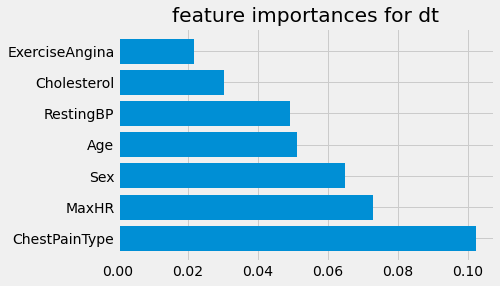

In [43]:
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Feature Importances for Decision Tree')
    plt.show()

# whatever your features are called
features_names = list(df_modelling.columns)

# Specify your top n features you want to visualize.
# You can also discard the abs() function 
# if you are interested in negative contribution of features
f_importances(abs(model_dt.feature_importances_), features_names, top=7)

# Random Forest Method

In [26]:
#For New ML Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

In [27]:
model_rf = RandomForestClassifier(random_state=11)
model_rf.fit(X_train_scaled, y_train)

#y_pred = model_rf.predict(X_dev_scaled)
preds_train_rf = model_rf.predict(X_train_scaled) # training data
preds_dev_rf = model_rf.predict(X_dev_scaled) # validation data
preds_test_rf = model_rf.predict(X_test_scaled) # testing data

In [28]:
print("training prediction samples:\n", preds_train_rf[:20])
print("training target samples:\n", y_test[:20].tolist())

training prediction samples:
 [1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1]
training target samples:
 [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [29]:
print("development prediction samples:\n", preds_dev_rf[:20])
print("development target samples:\n", y_test[:20].tolist())

development prediction samples:
 [1 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 1]
development target samples:
 [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [30]:
print("test prediction samples:\n", preds_test_rf[:20])
print("test target samples:\n", y_test[:20].tolist())

test prediction samples:
 [1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1]
test target samples:
 [1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [31]:
print(len(model_rf.estimators_))

100


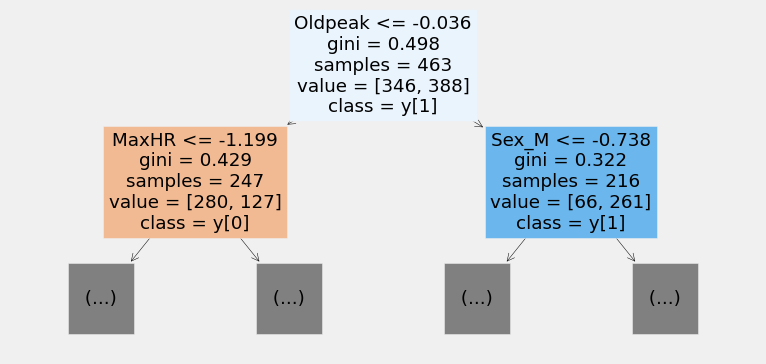

In [32]:
plt.figure(figsize=(12, 6))
tree.plot_tree(model_rf.estimators_[0],
               feature_names = model_rf.feature_names_in_, 
               max_depth = 1,
               class_names= True,
               filled = True);

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       328
           1       1.00      1.00      1.00       406

    accuracy                           1.00       734
   macro avg       1.00      1.00      1.00       734
weighted avg       1.00      1.00      1.00       734



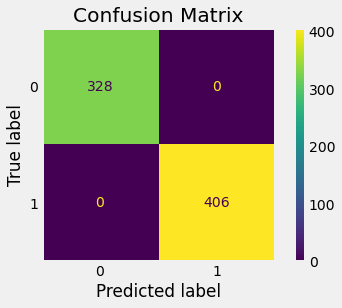

In [33]:
print(classification_report(y_train, preds_train_rf))

ConfusionMatrixDisplay.from_predictions(y_train, preds_train_rf)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        41
           1       0.98      0.92      0.95        51

    accuracy                           0.95        92
   macro avg       0.94      0.95      0.95        92
weighted avg       0.95      0.95      0.95        92



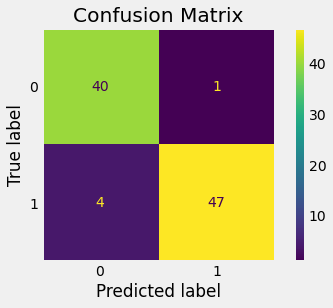

In [34]:
print(classification_report(y_dev, preds_dev_rf))

ConfusionMatrixDisplay.from_predictions(y_dev, preds_dev_rf)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        41
           1       0.90      0.90      0.90        51

    accuracy                           0.89        92
   macro avg       0.89      0.89      0.89        92
weighted avg       0.89      0.89      0.89        92



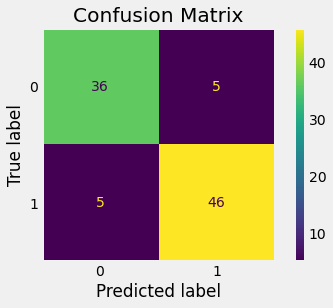

In [35]:
print(classification_report(y_test, preds_test_rf))

ConfusionMatrixDisplay.from_predictions(y_test, preds_test_rf)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled , y_train)
knn.score(X_train_scaled , y_train)

0.8732970027247956

In [40]:
knn.score(X_dev_scaled , y_dev)

0.8913043478260869

In [39]:
knn.score(X_test_scaled , y_test)

0.8695652173913043

In [ ]:
#from sklearn.preprocessing import Normalizer

#norm = Normalizer()
#new_df = norm.fit_transform(new_df)
#df2 = pd.DataFrame(new_df, columns=numerical_features)

In [ ]:
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score

#def performance_metric(y_true, y_predict):
#    """ Calculates and returns the performance score between 
#        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
#    score = r2_score(y_true, y_predict)
    
    # Return the score
#    return score

In [ ]:
# creating the Regressor
#regressor = LinearRegression()
#regressor.fit(X_train,y_train)

# make predictions and evaluate the results
#predict_y = regressor.predict(X_test)
#print('R-squared: ', r2_score(y_test, predict_y))

In [ ]:
#from sklearn.preprocessing import Normalizer

#norm = Normalizer()
#data = norm.fit_transform(data)
#data2 = pd.DataFrame(data, columns=['RM','PTRATIO','LSTAT','MEDV'])

In [ ]:
#standardization onehot encoding
#import onehot.encoder

#min/max scaling

#dummy for every feature

#outcome variable balance or inbalance mitigate if it is not balanaced
#std dev, mean,

#test train split 
#generalizability 
#cross validation 

#models and comparisons
#evaluation metrics to optimize

In [ ]:
#from sklearn import preprocessing
#df_norm = preprocessing.normalize(data)
#scaled_df = pd.DataFrame(df_norm, columns=names)
#scaled_df.head()

Findings:

According to the descriptive statistics;
- A greater proportion of male patients have heart disease than female patients. 
- In terms of the age distribution, as expected, heart disease is more common among the older patients. 
- More patients who experience exercise-induced angina have heart disease than those who did not experience any angina. 
- Greater proportion of older patients who have high colesterol have heart disease than younger patients. 
- Greater proportion of the patients have Asymptomatic chest pain. greater proportion of the patents who have asymptotic chest pain have heart disease.
- Atypical angina is more common among the patients who have high cholesterol.

- The correlation matrix indicates that there is no strong correlation between any of the variables and heart disease. In addition to that the following notable relationships between variables:

    Moderately Strong Correlations:
    OldPeak and Heat Disease ==> (.40)
    MaxHR and Heart Disease ==> (-.40)
    
- There is no significant outlier and missing data in the dataset.

According to the compared algorithms, Random Forest Model algorithm gives the best result in terms of accuracy. When examined in general, the algorithms give results that are close to each other. Achieved over 90% recall score with Random Forest Model 

Reference:
Springboard: Course cases - Logistic Regression

https://www.kaggle.com/code/muliadea/classification-heart-disease-prediction

https://www.kaggle.com/code/mennatallahnasr/heart-disease-classification-with-many-models

https://www.kaggle.com/code/kevinwellington/heart-failure-prediction-1